In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('max_colwidth', -1) # чтобы отображались все слова в строке

In [117]:
df = pd.DataFrame([
    ["Cats sleep anywhere, Any table, Any chair,"], 
    ["Top of piano, Window-ledge, In the middle, On the edge,"],
    ["Open drawer, Empty shoe, Anybody's Lap will do"],
    ["Fitted in a Cardboard box, In the cupboard With your frocks"],
    ["Anywhere! They don't care! Cat's sleep Anywhere."]],
    columns=['poem']
)

df

,poem
0,"Cats sleep anywhere, Any table, Any chair,"
1,"Top of piano, Window-ledge, In the middle, On the edge,"
2,"Open drawer, Empty shoe, Anybody's Lap will do"
3,"Fitted in a Cardboard box, In the cupboard With your frocks"
4,Anywhere! They don't care! Cat's sleep Anywhere.


Что внутри датафрейма? Предложение целиком. Это значит, что нам нужно разбить его на слова

In [118]:
df.iloc[0]['poem']

'Cats sleep anywhere, Any table, Any chair,'

In [119]:
df.loc[:, 'splitted_poem'] = df['poem'].map(lambda x: x.lower().strip().split(' '))

df.iloc[0]['splitted_poem']

['cats', 'sleep', 'anywhere,', 'any', 'table,', 'any', 'chair,']

# Превращаем текст в числа


# CountVectorizer = bag of words 

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
X_train, X_test = train_test_split(df, test_size=0.3)
X_train.head()

,poem,splitted_poem
4,Anywhere! They don't care! Cat's sleep Anywhere.,"[anywhere!, they, don't, care!, cat's, sleep, anywhere.]"
3,"Fitted in a Cardboard box, In the cupboard With your frocks","[fitted, in, a, cardboard, box,, in, the, cupboard, with, your, frocks]"
0,"Cats sleep anywhere, Any table, Any chair,","[cats, sleep, anywhere,, any, table,, any, chair,]"


In [121]:
X_test.head()

,poem,splitted_poem
1,"Top of piano, Window-ledge, In the middle, On the edge,","[top, of, piano,, window-ledge,, in, the, middle,, on, the, edge,]"
2,"Open drawer, Empty shoe, Anybody's Lap will do","[open, drawer,, empty, shoe,, anybody's, lap, will, do]"


In [122]:
# в CountVectorizer подаем в формате ['предложение1', 'предложение2', 'предложение3', ...]
countvect = CountVectorizer()
features = countvect.fit_transform(X_train['poem'].values)

print(f"\nрезультат работы CountVectorizer:\n{features.toarray()}")
print(f"\nполучившиеся столбцы:\n{countvect.get_feature_names()}")

X_train_cv_transformed = pd.DataFrame(
    features.toarray(),
    columns=countvect.get_feature_names()
)

X_train_cv_transformed


результат работы CountVectorizer:
[[0 2 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0]
 [0 0 1 1 0 0 0 0 1 0 1 1 2 0 0 1 0 1 1]
 [2 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0]]

получившиеся столбцы:
['any', 'anywhere', 'box', 'cardboard', 'care', 'cat', 'cats', 'chair', 'cupboard', 'don', 'fitted', 'frocks', 'in', 'sleep', 'table', 'the', 'they', 'with', 'your']


,any,anywhere,box,cardboard,care,cat,cats,chair,cupboard,don,fitted,frocks,in,sleep,table,the,they,with,your
0,0,2,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,1,0,0,0,0,1,0,1,1,2,0,0,1,0,1,1
2,2,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0


In [124]:
features.todense()

matrix([[0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1],
        [2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]],
       dtype=int64)

In [90]:
# отдельно transform на тесте
X_test_cv_transformed = pd.DataFrame(
    countvect.transform(X_test['poem']).todense(),
    columns=countvect.get_feature_names()
)

X_test_cv_transformed

,anybody,anywhere,box,cardboard,care,cat,cupboard,do,don,drawer,...,in,lap,open,shoe,sleep,the,they,will,with,your
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2,0,0,0,0


# TF-IDF = Term Frequency * Inverse Document Frequency

https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [96]:
tfidf = TfidfVectorizer()

data = tfidf.fit_transform(X_train['poem']).toarray()

print(f"\nрезультат работы TfidfVectorizer:\n{data}")
print(f"\nполучившиеся столбцы:\n{tfidf.get_feature_names()}")

X_train_tfidf_transfomed = pd.DataFrame(
    data,
    columns=tfidf.get_feature_names()
) 

X_train_tfidf_transfomed


результат работы TfidfVectorizer:
[[0.         0.         0.28867513 0.28867513 0.         0.
  0.28867513 0.         0.         0.         0.         0.28867513
  0.28867513 0.57735027 0.         0.         0.         0.
  0.28867513 0.         0.         0.28867513 0.28867513]
 [0.35355339 0.         0.         0.         0.         0.
  0.         0.35355339 0.         0.35355339 0.35355339 0.
  0.         0.         0.35355339 0.35355339 0.35355339 0.
  0.         0.         0.35355339 0.         0.        ]
 [0.         0.66666667 0.         0.         0.33333333 0.33333333
  0.         0.         0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.33333333
  0.         0.33333333 0.         0.         0.        ]]

получившиеся столбцы:
['anybody', 'anywhere', 'box', 'cardboard', 'care', 'cat', 'cupboard', 'do', 'don', 'drawer', 'empty', 'fitted', 'frocks', 'in', 'lap', 'open', 'shoe', 'sleep', 'the', 'they', 'will', 'with', 'your']


,anybody,anywhere,box,cardboard,care,cat,cupboard,do,don,drawer,...,in,lap,open,shoe,sleep,the,they,will,with,your
0,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000,...,0.57735,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,0.288675,0.288675
1,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000,0.353553,...,0.00000,0.353553,0.353553,0.353553,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000
2,0.000000,0.666667,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000


In [97]:
# отдельно transform на тесте
X_test_tfidf_transformed = pd.DataFrame(
    tfidf.transform(X_test['poem']).toarray(),
    columns=tfidf.get_feature_names()
)

X_test_tfidf_transformed

,anybody,anywhere,box,cardboard,care,cat,cupboard,do,don,drawer,...,in,lap,open,shoe,sleep,the,they,will,with,your
0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.447214,0.0,0.0,0.0,0.000000,0.894427,0.0,0.0,0.0,0.0


# Homework

- что такое min_df и max_df в параметрах TfidfVectorizer?

# Предобработка текстов

### 1. Токенизация = разбиение текста на более мелкие части, токены

### 2. Обработка токенов:

- **лемматизация** = приведение к нормальной форме (drove --> drive)
- **стемминг** = процесс нахождения основы слова для заданного исходного слова (котиков --> котик)

Есть проблема: сильная привязка к конкретному языку

Основы Natural Language Processing для текста
https://habr.com/ru/company/Voximplant/blog/446738/

In [100]:
tfidf.get_feature_names()

['anybody',
 'anywhere',
 'box',
 'cardboard',
 'care',
 'cat',
 'cupboard',
 'do',
 'don',
 'drawer',
 'empty',
 'fitted',
 'frocks',
 'in',
 'lap',
 'open',
 'shoe',
 'sleep',
 'the',
 'they',
 'will',
 'with',
 'your']

# Библиотека nltk

In [102]:
import nltk

In [7]:
nltk.download()
# try nltk.set_proxy()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

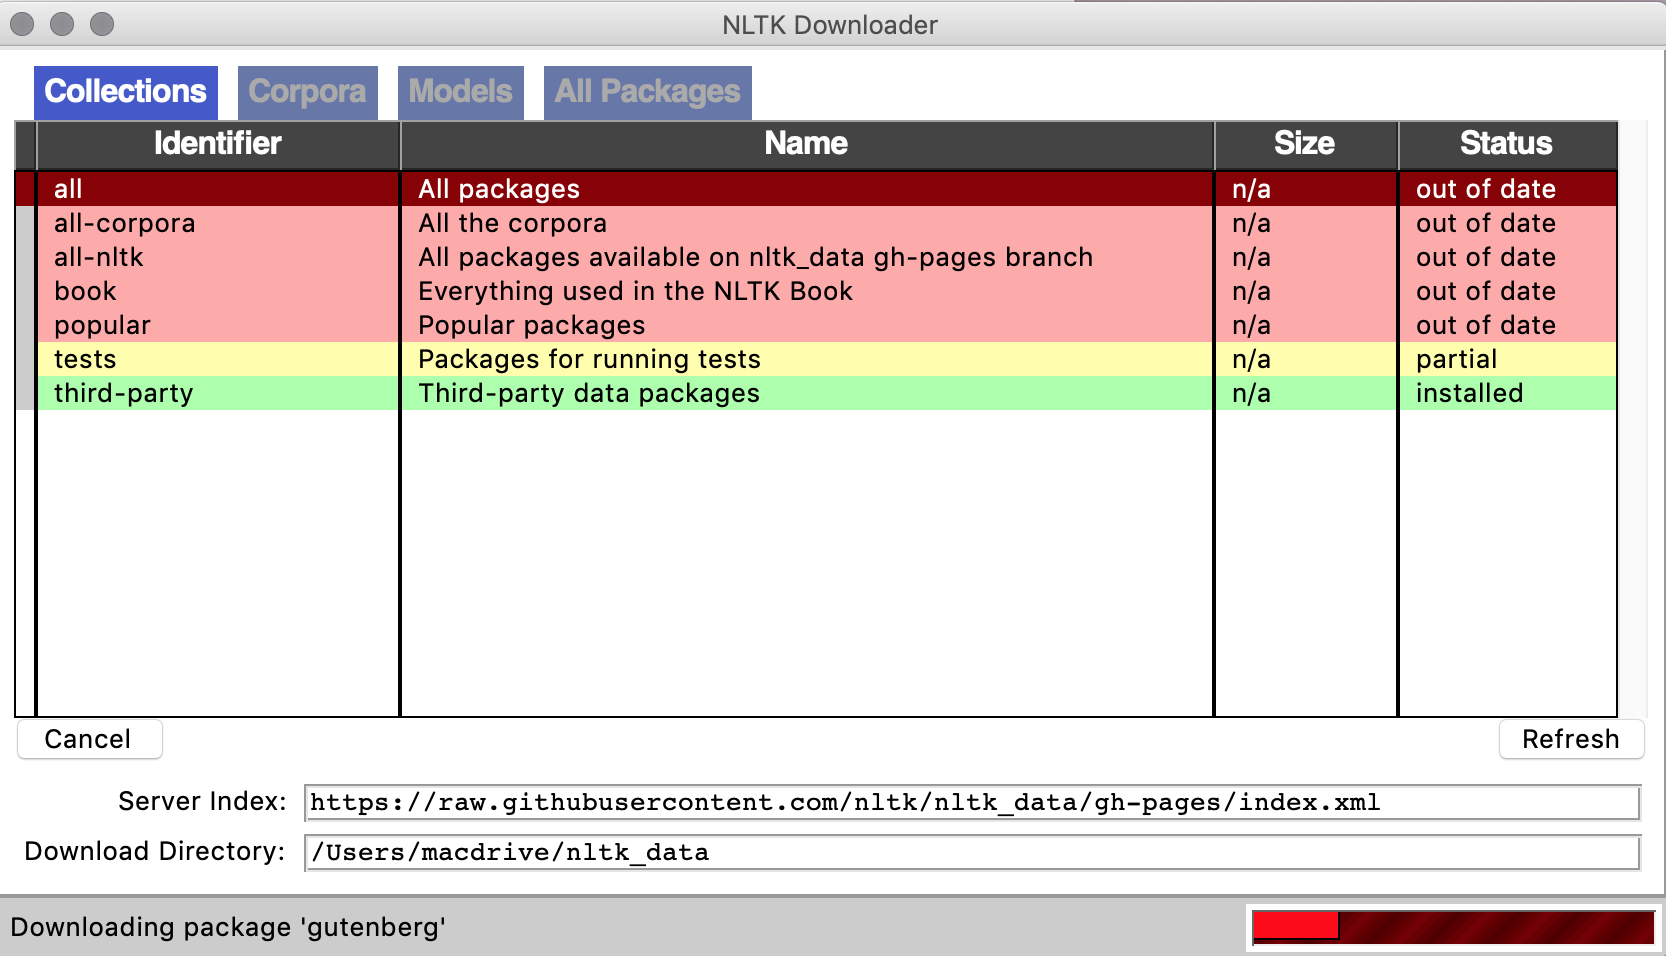

In [105]:
text = "feet cats wolves talked"

# разобьем на токены
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
print(tokens)

# стемминг!
stemmer = nltk.stem.PorterStemmer()

" ".join(stemmer.stem(token) for token in tokens)

['feet', 'cats', 'wolves', 'talked']


'feet cat wolv talk'

In [128]:
# а что насчет русских слов?
from nltk import SnowballStemmer

text = "Филипп пошёл в Авеньон и пленил пап!"
tokens = tokenizer.tokenize(text)
print(tokens)

stemmer = SnowballStemmer('russian')

" ".join(stemmer.stem(token) for token in tokens)

['Филипп', 'пошёл', 'в', 'Авеньон', 'и', 'пленил', 'пап', '!']


'филипп пошел в авеньон и плен пап !'

### stop words - используем для удаления из нашего текста

- есть встроеные в nltk

<code>
my_vocabulary = [word for word in words if word not in stopwords]
</code>

In [127]:
stopwords_ru = nltk.corpus.stopwords.words('russian') 
len(stopwords_ru)
stopwords_ru

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [126]:
stopwords_eng = nltk.corpus.stopwords.words('english') 
len(stopwords_eng)

179

# библиотека pymorty2
(https://pymorphy2.readthedocs.io/en/0.2/user/index.html) 

In [112]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

text = "Филипп пошёл в Авеньон и пленил пап!"
tokens = tokenizer.tokenize(text)

" ".join(morph.normal_forms(token)[0] for token in tokens)

'филипп пойти в авеньон и пленить папа !'

In [113]:
morph.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.984662, methods_stack=((<DictionaryAnalyzer>, 'стали', 904, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 9),))]

In [114]:
# прогнозы для неизвестных слов
morph.parse('бутявковедами')

[Parse(word='бутявковедами', tag=OpencorporaTag('NOUN,anim,masc plur,ablt'), normal_form='бутявковед', score=1.0, methods_stack=((<FakeDictionary>, 'бутявковедами', 52, 10), (<KnownSuffixAnalyzer>, 'едами')))]

# Пример

Обычно пишут функцию, которая делает все и сразу

In [115]:
from nltk.corpus import stopwords
import re
import nltk
import pymorphy2

stopwords_rus = set(stopwords.words('russian'))

def token_lemma(text, stop = None, lemmatizer=None):
    """ 
    Возвращает тексты: 
        * очищенные от тэгов, - ok
        * лемматизированные, 
        * без стоп-слов, 
        * в нижнем регистре, - ok
        * все слова длиннее >=3 - ok

    text: string
        Текст поста

    parameters: list 
        stop: список из стоп-слов, example: ['политик', 'выбирать']
    """
    
    text = re.sub('<[^<]+?>', '', str(text).lower()) 
    words = re.findall('\w+', text)
    
    morph = pymorphy2.MorphAnalyzer()
    words = [morph.normal_forms(word)[0] for word in words if len(word) >= 3]
    
    if stop:
        words = [word for word in words if word not in stop]
    return ' '.join(words)
